## Homework 08

#### Due: *01 November 2019*
#### *DATA 1010*

In [9]:
using Pkg; Pkg.add("DecisionTree")
import Pkg; Pkg.add("LIBSVM")

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [2]:
import Pkg; Pkg.add("Statistics")
import Pkg; Pkg.add("MLDatasets")

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [8]:
using Random, LinearAlgebra, Statistics, Distributions, Plots, LIBSVM, MLDatasets, DecisionTree
include("hw08.jl");

In [19]:
using LIBSVM
include("hw08.jl")

svm_projections (generic function with 1 method)

---

## Problem 1

Apply the Lagrange duality method we applied in class to the soft-margin SVM to the problem of minimizing the objective function $f(x,y) = x^2 + y^2$ subject to the constraint $x + y \ge 5$. Show that strong duality holds (that is, we get the same value for the objective function if we swap min and max).

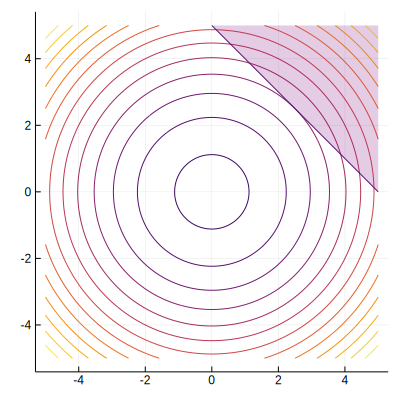

In [4]:
lagrange_example()

The problem of minimizing $x^{2}+y^{2}$ subject to the constraint
$x+y\geq5$ is thus equivalent to the problem 
$\min x^{2}+y^{2}-H(x+y-5)$

This new minimization problem, however, can be written as the following
min max problem: $\min_{x,y}\max_{\lambda}[x^{2}+y^{2}-\lambda(x+y-5)]$

Now let's show that strong duality holds: i.e., that we get the same
value for the objective function if we swap min and max.

Let's first just evaluate the original min max problem. Following
the video, I will use the metaphor of the outer and inner maximizing/minimizing agents to talk about this problem.

* If values are assigned to $x$ and $y$ such that $x+y-5<0$ ---
i.e., so that $-(x+y-5)>0$ --- then the inner maximizing agent would
be able to manipulate $\lambda$ so as to get the function as large
as it pleases.  
* So, the outer minimizing agent, seeing that the above is the case,
will assign values to $x$ and $y$ such that $x+y-5=0$, and hence
$-\lambda(x+y-5)=0$.
* The problem thus becomes: $\min_{x}[2x^{2}-10x+25]$.
* Differentiating that inner function yields $4x-10$; so that the $x$
that minimizes the equation is $2.5$, and similarly the corresponding
$y$ is $2.5$.  

Now let's show that swapping min and max still gets us the same result
--- i.e., that $\max_{\lambda}\min_{x,y}[x^{2}+y^{2}-\lambda(x+y-5)]=2.5$:  
* We want to start working from the inner minimizing function, taking
$\lambda$ as given for now. Setting each of the partial derivatives
of the function wrt to $y$ and $x$ to $0:$ $2x-\lambda=0;2y-\lambda=0;$
so, the values of $x$ and $y$ that minimize the function are: $x=\lambda/2=y$.
* We thus have an equation in $\lambda$: $\max_{\lambda}[(\frac{\lambda}{2})^{2}+(\frac{\lambda}{2})^{2}-\lambda(\lambda/2+\lambda/2-5)]$
* Differentiating, we find that the value of $\lambda$ that maximizes
that is $5$.
* And so, taking that value of $\lambda$ as given, the value of each
of $x$ and $y$ that minimizes the inner function is $2.5$ ---
which is what we wanted.


---

## Problem 2

Show that the minimax inequality sometimes holds strictly. In other words, find a function $(x,y) \mapsto f(x,y)$ such that $\min_{x} \max_{y} f(x, y)>\max _{y} \min_{x} f(x, y)$.

Hint: consider functions $f$ on the unit square which are constant on the regions shown in blue and orange below. 

Explain in loose terms why you would not expect this kind of behavior to emerge when $f$ is a convex function on the unit square.

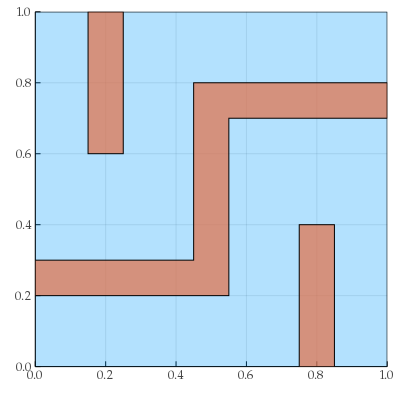

In [13]:
minimax_example()

*Solution*. 

---

## Problem 3

Use the code below to simulate a dataset with two classes, one of which is Gaussian with mean zero and covariance $I$ in $\mathbb{R}^p$, while the other is Gaussian with mean $\mu\mathbf{1}$ and covariance $I$ (note: $\mathbf{1}$ represents a vector of ones in $\mathbb{R}^p$. Explore the following questions empirically. 

(a) Is there a difference between the distribution of the number of support vectors in linearly separable instances and the number of support vectors in instances which are not separable? Note that you can make two histograms at once by supplying a vector to use for grouping to the `group` keyword argument.  
(b) What should the direction of $\boldsymbol{\beta}$ be, given the way in which the data were generated? (In other words, the decision boundary for the Bayes classifier is actually a hyperplane; what unit vector $\boldsymbol{\beta}$ is perpendicular to that hyperplane?) Does $\boldsymbol{\beta}$ come out to be very close to this value?  
(c) How does the number of support vectors vary with dimension? Choose a $\mu$ value which is large enough to ensure that the classes are linearly separated with high probability.  
(d) How does the number of support vectors vary with $C$? Try a few $\mu$ values. 

*Solution*. 

In [6]:
# the value 5/9 is chosen so that separated and non-separated examples are both well represented
SV_counts, sep_values = count_support_vectors(num_runs=100, sample_size=100, dim=20, μ=5/9)

([20, 20, 27, 23, 29, 21, 29, 26, 20, 26  …  20, 20, 21, 27, 22, 23, 21, 19, 28, 19], Bool[1, 1, 0, 0, 0, 0, 0, 0, 1, 0  …  1, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [7]:
# (b)
X, y, model = simulate_and_train(sample_size=1000, dim=20, μ=0.58)
β = -model.SVs.X * model.coefs
β / norm(β)

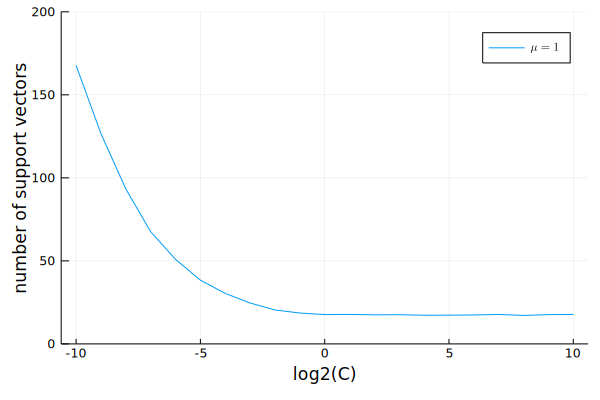

In [8]:
# (d)
Cs = 2.0 .^(-10:10)
plot(-10:10,
    [mean(count_support_vectors(num_runs=100, sample_size=200, dim=20, μ=1, C=C)[1]) for C in Cs],
    label = L"\mu = 1", xlabel = "log2(C)", ylabel = "number of support vectors", fontfamily = "Palatino",
    ylims = (0,200))

---

## Problem 4

Use LIBSVM to project the zeros and ones in the MNIST training set to the orthogonal complement of the vector $\boldsymbol{\beta}$ obtained by training a linear SVM on the original data. Are these new data linearly separable? What does your low-dimensional intuition suggest?

In [20]:
svm_projections()

ErrorException: could not load library "/Users/ymh/.julia/packages/LIBSVM/jzCVO/src/../deps/libsvm.so.2"
dlopen(/Users/ymh/.julia/packages/LIBSVM/jzCVO/src/../deps/libsvm.so.2.dylib, 1): image not found

*Response*.

My low-dimensional intuition suggests that they are linearly separable.


In [22]:
features, labels = load_MNIST_zeros_and_ones();


784×12665 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

---

## Problem 5

Use LIBSVM to train an SVM classifier on the Enron email data from Homework 07 (using the same scheme to encode the email messages as vectors). Try a linear classifier as well as one trained with radial basis functions, and select your value for $C$ using cross-validation on a withheld subset of the training data. Test your classifier on one of the folders which was not used for training–which performs better?

*Solution*. 

In [0]:
import Pkg; Pkg.add("HTTP"); Pkg.add("TextAnalysis")

# See Day 20 Problem 4 for discussion of the emials

---

## Problem 6

The kernelized soft-margin SVM turns out to boil down to a story eerily reminiscient of kernel density estimation: at each training observation, we spread out a *charge* in the shape of the chosen kernel (charge, now, instead of mass, since it can carry a positive or negative sign) centered at each training observation. Given a point $\mathbf{x}$ to make a prediction for, we sum the amounts of charge contributed at $\mathbf{x}$ from each of the training points, and just work out whether the resulting sum is positive or negative. 

The way in which the charges are distributed has some constraints: the amount of charge associated with each training point is never more than $C$ and never has the opposite sign to the class of the training point. Also, we have to put the same total amount of charge on the positive and negative training examples.

We could build a machine learning model which is more similar to kernel density estimation: each training point gets the same total amount of charge (positive it's positive, negative otherwise). Such a model would be significantly less effective than the kernelized soft-margin SVM on real-world data. Describe what you think its main advantages are. 

Hint: starting with the code below, make a plot which shows the support vectors for the radial-basis SVM (with high cost value), for the given set of curvily entangled data.

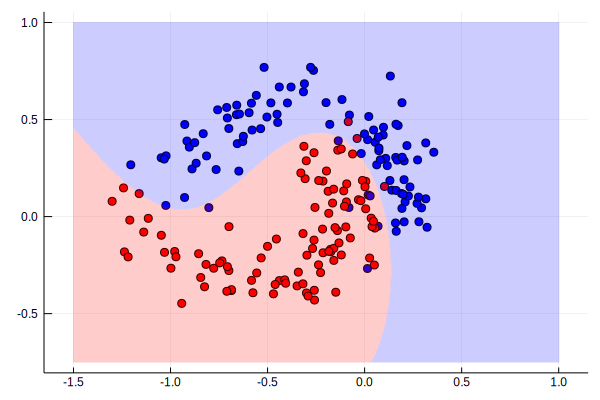

In [11]:
using Random; Random.seed!(123)

function randblue()
    t = rand()
    [t*cos(3t), t*sin(3t)] + 0.1*randn(2)
end

function randred()
    t = rand()
    [-0.25, 0.25] + [t*cos(3t), -t*sin(3t)] + 0.1*randn(2)
end

n = 100
X = [vcat([randblue()' for _ in 1:n]...); vcat([randred()' for _ in 1:n]...)];
y = repeat([-1,1], inner = n);

model = svmtrain(X', y, cost = 100.0)

scatter(X[:,1], X[:,2], legend = false, ratio = 1, group = y, color = [:blue :red])
heatmap!(-1.5:0.005:1, -0.75:0.005:1, (x,y) -> svmpredict(model, reshape([x y],(2,1)))[1][1], 
         fillopacity = 0.2, fillcolor = cgrad([:blue, :red]))

*Solution*. 

---

## Problem 7

Train 100 `DecisionTreeClassifier`s on a randomly selected sample of size 50 chosen from the Iris training observations. Just use the first two features, so you can plot a heatmap. How volatile are the predictions from one such tree to another? Consider making several heatmap images and displaying them in a grid, like so:
```julia
p = [scatter(randn(20), randn(20), label = "") for _ in 1:12] # a dozen random plots
plot(p..., layout = (4,3), size = (1000,600))
```
How volatile are the predictions made by plurality vote of the ensemble of 100 classifiers? Describe qualitatively.

*Solution*. 

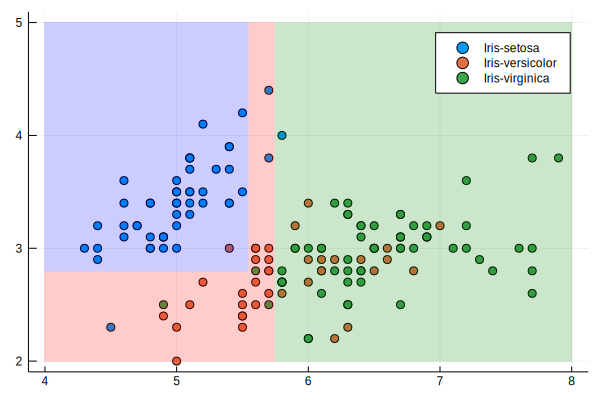

In [12]:
using DecisionTree
features, labels = load_data("iris")
labeldict = Dict(map(reverse,enumerate(collect(Set(labels)))))

model = DecisionTreeClassifier(max_depth=3)
inds = rand(1:length(labels), 50) # subsample training data
DecisionTree.fit!(model, features[inds,1:2], labels[inds])
scatter(features[:,1], features[:,2], group = labels)

heatmap!(4:0.01:8, 2:0.01:5, 
         (x,y) -> labeldict[DecisionTree.predict(model, Any[x y])[1]], 
         fillopacity = 0.2, fillcolor = cgrad([:red, :green, :blue]), colorbar = false)